# App Rating Prediction
By Elizabeth Ramos



# Steps to perform:

Load the data file using pandas.  - done 

Check for null values in the data. Get the number of null values for each column. - done

Drop records with nulls in any of the columns. -- done

Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 

Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric. - done

Extract the numeric value from the column -done

Multiply the value by 1,000, if size is mentioned in Mb  -done

Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float). - done

Installs field is currently stored as string and has values like 1,000,000+. - done

Treat 1,000,000+ as 1,000,000 - done

remove ‘+’, ‘,’ from the field, convert it to integer -done

Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric. -done

5. Sanity checks:

Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range. --done

Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them. --done

For free apps (type = “Free”), the price should not be >0. Drop any such rows. --done

5. Performing univariate analysis: 

Boxplot for Price

Are there any outliers? Think about the price of usual apps on Play Store.

Boxplot for Reviews

Are there any apps with very high number of reviews? Do the values seem right?

Histogram for Rating

How are the ratings distributed? Is it more toward higher ratings?

Histogram for Size

Note down your observations for the plots made above. Which of these seem to have outliers?


6. Outlier treatment: 

Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!

Check out the records with very high price

Is 200 indeed a high price?

Drop these as most seem to be junk apps

Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

Decide a threshold as cutoff for outlier and drop records having values more than that

7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

Make scatter plot/joinplot for Rating vs. Price

What pattern do you observe? Does rating increase with price?

Make scatter plot/joinplot for Rating vs. Size

Are heavier apps rated better?

Make scatter plot/joinplot for Rating vs. Reviews

Does more review mean a better rating always?

Make boxplot for Rating vs. Content Rating

Is there any difference in the ratings? Are some types liked better?

Make boxplot for Ratings vs. Category

Which genre has the best ratings?

For each of the plots above, note down your observation.

8. Data preprocessing

For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

10. Separate the dataframes into X_train, y_train, X_test, and y_test.

11 . Model building

Use linear regression as the technique

Report the R2 on the train set

12. Make predictions on test set and report R2.

In [1]:
# Import the necessary libraries
import pandas as pd   # for data manipulation
import numpy as np    # linear algebra, numeric datatypes
import matplotlib.pyplot as plt 
import seaborn as sns
# for Train test split and Linear Regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing 
# for the prediction of the test
from statsmodels.api import OLS
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as ms

In [2]:
# Load the data file using pandas. 
df = pd.read_csv('googleplaystore.csv')

In [3]:
# Lets explore the first 5 rows of the data set
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# Lets check the last 10 rows of the data frame
df.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
# Let's see the datatypes and the count for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.describe().round()

,Rating
count,9367.0
mean,4.0
std,1.0
min,1.0
25%,4.0
50%,4.0
75%,4.0
max,19.0


Observations:
- Our data frame consists of 10841 entries and 13 columns
- The only float64 type is our Target variable, the rest are object type which means we need to perform some data change type
- We see the names of the columns with spaces, lets have them together for better readeability
- Probably we need to drop some columns no needed for our analysis
- Some variables seem to have inconsistent formatting.
- Our Target variable has some NaN, since there are 10,841 entries and we had a count of 9,367 records which mean that we probably have 1,474 missing values in our target variable. We need to explore if we have other variables with NaN also
- The max value in Rating is 19 which tell us that we need to clean some data 

# Data Cleaning:

In [7]:
# Rename columns
df.rename(columns ={ 'Content Rating': 'Content_rating', 'Last Updated': 'Last_updated',
                    'Current Ver': 'Current_version','Android Ver': 'Android_version'}, inplace = True)

In [8]:
# Lets check the column names again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              10841 non-null  object 
 1   Category         10841 non-null  object 
 2   Rating           9367 non-null   float64
 3   Reviews          10841 non-null  object 
 4   Size             10841 non-null  object 
 5   Installs         10841 non-null  object 
 6   Type             10840 non-null  object 
 7   Price            10841 non-null  object 
 8   Content_rating   10840 non-null  object 
 9   Genres           10841 non-null  object 
 10  Last_updated     10841 non-null  object 
 11  Current_version  10833 non-null  object 
 12  Android_version  10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
# Check for null values in the data
df.isnull().values.any()

True

In [10]:
#  Get the number of null values for each column
df.isnull().sum()

App                   0
Category              0
Rating             1474
Reviews               0
Size                  0
Installs              0
Type                  1
Price                 0
Content_rating        1
Genres                0
Last_updated          0
Current_version       8
Android_version       3
dtype: int64

Our target variable is Rating, and is the variable with the most null values. So, we need to drop them because if we replace with zeros it will affect our model prediction.
Since, there are only 1 missing in Type variable, 1 missing in Content Rating Variable, and 3 missing in Android Ver variable, we can dropp them too 

In [11]:
# Since we are going to drop all null values in this particular scenario we can use:
df.dropna(inplace = True)

In [12]:
# Lets check for null values again:
df.isnull().sum()

App                0
Category           0
Rating             0
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content_rating     0
Genres             0
Last_updated       0
Current_version    0
Android_version    0
dtype: int64

In [13]:
# Lets check the shape of the dataframe
df.shape

(9360, 13)

In [14]:
# Lets check the info on the dataframe again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              9360 non-null   object 
 1   Category         9360 non-null   object 
 2   Rating           9360 non-null   float64
 3   Reviews          9360 non-null   object 
 4   Size             9360 non-null   object 
 5   Installs         9360 non-null   object 
 6   Type             9360 non-null   object 
 7   Price            9360 non-null   object 
 8   Content_rating   9360 non-null   object 
 9   Genres           9360 non-null   object 
 10  Last_updated     9360 non-null   object 
 11  Current_version  9360 non-null   object 
 12  Android_version  9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


- Fixing variables with incorrect type and inconsistent formatting

a) Variables with incorrect data type:
 - Reviews (object) need to be changed to --> to_numeric (int/float)
 - Installs (object) need to be changed to --> integer
 - Price (object) need to be changed to --> numeric
 - Size (object) need to be changed to --> float
 - Last_updated, Current_version and Android_version may be needed it but per this exercise request, these columns need to be dropped later, so no need to perform anything in those variables
 
b) Variables with incosistent formatting:
 - Price: '$' need to be replaced by ''
 - Size: column has sizes in Kb as well as Mb. Extract the numeric value from the column multiply the value by 1,000, if size is    mentioned in Mb

a) Fixing variables with incorrect data types

In [15]:
# variable: Reviews
df['Reviews']  = pd.to_numeric(df['Reviews'])
print(df.dtypes)


App                 object
Category            object
Rating             float64
Reviews              int64
Size                object
Installs            object
Type                object
Price               object
Content_rating      object
Genres              object
Last_updated        object
Current_version     object
Android_version     object
dtype: object


In [16]:
# Variable 'Installs'. Lets check what values it contains:
unique_v =df['Installs'].unique()
print (unique_v)

['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '100+' '500+' '10+' '5+' '50+' '1+']


In [17]:
# So, This variable need to be converted to integer, but it contains special characteres like ',' and '+'. So, in order to do 
# that we need to replace them by '' then we can change the variable 'Installs' to integer
df['Installs'] = df['Installs'].str.replace('[,,+]','')


<ipython-input-17-63595b9f9901>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Installs'] = df['Installs'].str.replace('[,,+]','')


In [18]:
# Lets double check 
unique_v =df['Installs'].unique()
print (unique_v)

['10000' '500000' '5000000' '50000000' '100000' '50000' '1000000'
 '10000000' '5000' '100000000' '1000000000' '1000' '500000000' '100' '500'
 '10' '5' '50' '1']


In [19]:
# Now we can change the data type to integer
df['Installs'] = pd.to_numeric(df['Installs'])
print(df.dtypes)

App                 object
Category            object
Rating             float64
Reviews              int64
Size                object
Installs             int64
Type                object
Price               object
Content_rating      object
Genres              object
Last_updated        object
Current_version     object
Android_version     object
dtype: object


In [20]:
# Variable: Price
# Lets check to see if there is any sort of inconsistency
unique_p =df['Price'].unique()
print (unique_p)

['0' '$4.99' '$3.99' '$6.99' '$7.99' '$5.99' '$2.99' '$3.49' '$1.99'
 '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99' '$11.99'
 '$79.99' '$16.99' '$14.99' '$29.99' '$12.99' '$2.49' '$10.99' '$1.50'
 '$19.99' '$15.99' '$33.99' '$39.99' '$3.95' '$4.49' '$1.70' '$8.99'
 '$1.49' '$3.88' '$399.99' '$17.99' '$400.00' '$3.02' '$1.76' '$4.84'
 '$4.77' '$1.61' '$2.50' '$1.59' '$6.49' '$1.29' '$299.99' '$379.99'
 '$37.99' '$18.99' '$389.99' '$8.49' '$1.75' '$14.00' '$2.00' '$3.08'
 '$2.59' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04' '$13.99' '$4.29'
 '$3.28' '$4.60' '$1.00' '$2.95' '$2.90' '$1.97' '$2.56' '$1.20']


In [21]:
# So, we have the $ sign that needs to be removed then convert it to numeric
df['Price'] = df['Price'].str.replace('$','')
# Change the datatype 
df['Price'] = pd.to_numeric(df['Price'])


<ipython-input-21-a683cd5a22e7>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$','')


In [22]:
# Variable: Size
# Request: Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.
# Lets check 
df['Size'].unique()


array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

It has the characters 'M', 'k' and the string 'Varies with device'

In [23]:
# Lets clean it
# First, lets replace "Varies with device" with "0k"
df['Size'] = df['Size'].replace(['Varies with device'],'0k')

In [24]:
# Lets check it again
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', '0k', '9.4M', '15M', '10M', '1.2M', '26M', '8.0M', '7.9M',
       '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M', '8.6M', '2.4M',
       '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M', '8.9M', '3.9M',
       '2.9M', '38M', '32M', '5.4M', '18M', '1.1M', '2.2M', '4.5M',
       '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M', '7.1M', '22M',
       '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M', '5.9M', '13M',
       '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M', '42M', '9.1M',
       '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M',
       '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M',
       '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M', '3.7M',
       '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M', '3.0M',
       '7.2M',

Now, we have only 'M' and 'k'. In order to convert it we need to:
- Extract the numeric value from the column
- Multiply the value by 1,000, if size is mentioned in Mb

In order to do that, lets remove the "M", 'K", and "k" and add it to another column named Measure, then do the calculations based
on the type of measure, once the calculation is performed, dropp the column Measure since we don't need it 

In [25]:
# First, lets extract the characters and move it to the new column 'Measure'
df ['Measure'] = df['Size'].str[-1:]

In [26]:
# Now, lets remove the 'M' or 'k' 
df['Size'] = df['Size'].replace({'M':'','K':'','k':''},regex=True)

In [27]:
#lets check it out
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_rating,Genres,Last_updated,Current_version,Android_version,Measure
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,M
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,M
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,M


In [28]:
# Now, in order to multiply by 100 we need to convert it to float data type
df['Size'] = df ['Size'].astype(float)

In [29]:
# Make the conversion to k, multiplying by 1000 if the Measure = 'M'
df['Size'] = np.where(df['Measure']=='M', df['Size']* 1000, df['Size'])

In [30]:
# After the calculation has been performed, we can drop the column 'Measure'
# Since we are removing a column, lets create a new data frame, and call it app_rating
app_rating = df.drop(['Measure'], axis = 1)


In [31]:
# lets check the new data frame
app_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              9360 non-null   object 
 1   Category         9360 non-null   object 
 2   Rating           9360 non-null   float64
 3   Reviews          9360 non-null   int64  
 4   Size             9360 non-null   float64
 5   Installs         9360 non-null   int64  
 6   Type             9360 non-null   object 
 7   Price            9360 non-null   float64
 8   Content_rating   9360 non-null   object 
 9   Genres           9360 non-null   object 
 10  Last_updated     9360 non-null   object 
 11  Current_version  9360 non-null   object 
 12  Android_version  9360 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1023.8+ KB


b) Variables with incosistent formatting:
 - Price: '$' need to be replaced by ''
 - Size: column has sizes in Kb as well as Mb. Extract the numeric value from the column multiply the value by 1,000, if size is    mentioned in Mb
 These operations were performed above

5. Sanity checks:

Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

For free apps (type = “Free”), the price should not be >0. Drop any such rows.


In [32]:
# Checking for the Average rating 
app_rating['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [33]:
rating_bigger_5 = app_rating.Rating > 5

In [34]:
rating_bigger_5.value_counts()

False    9360
Name: Rating, dtype: int64

In [35]:
rating_less_0 = app_rating.Rating < 0
rating_less_0.value_counts()

False    9360
Name: Rating, dtype: int64

Observation: All ratings are in range

 Checking for Reviews: Reviews should not be more than installs as only those who installed can review the app. 
If there are any such records, drop them.

In [36]:
# If Reviews are bigger than Installs then drop it
# Lets see if we have some records
greater_reviews = app_rating.Reviews > app_rating.Installs
greater_reviews.value_counts()

False    9353
True        7
dtype: int64

In [37]:
# So, we have 7 records that we need to drop. Lets create a new data frame
app_rating2 = app_rating[app_rating.Reviews < app_rating.Installs].copy()


In [38]:
#Lets check the new data frame:
print(app_rating2.shape)

(9351, 13)


For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [39]:
# Lets check if there is any
app_rating2[np.logical_and(app_rating['Type'] == 'Free', app_rating['Price'] > 0)]

<ipython-input-39-86e75fa0fe76>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app_rating2[np.logical_and(app_rating['Type'] == 'Free', app_rating['Price'] > 0)]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_rating,Genres,Last_updated,Current_version,Android_version


No records found with Free type and price > 0

# 5. Performing univariate analysis: 

a) Boxplot for Price

b) Are there any outliers? Think about the price of usual apps on Play Store.

c) Boxplot for Reviews

d) Are there any apps with very high number of reviews? Do the values seem right?

e) Histogram for Rating

f) How are the ratings distributed? Is it more toward higher ratings?

g) Histogram for Size

Note down your observations for the plots made above. Which of these seem to have outliers?

In [40]:
# Perform univariate 
app_rating2.describe()

,Rating,Reviews,Size,Installs,Price
count,9351.000000,9.351000e+03,9351.000000,9.351000e+03,9351.000000
mean,4.191103,5.148707e+05,18961.045075,1.792598e+07,0.961673
std,0.514959,3.146496e+06,23026.586915,9.130859e+07,15.829226
min,1.000000,1.000000e+00,0.000000,5.000000e+00,0.000000
25%,4.000000,1.880000e+02,2400.000000,1.000000e+04,0.000000
50%,4.300000,5.968000e+03,9500.000000,5.000000e+05,0.000000
75%,4.500000,8.187600e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


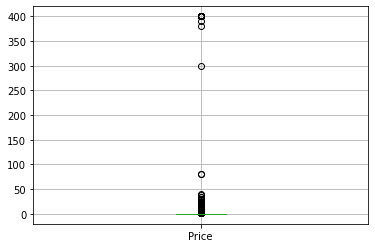

In [41]:
#a) Boxplot for Price
boxplot_price = app_rating2.boxplot(column = ['Price'])

b) Are there any outliers? Think about the price of usual apps on Play Store.

Yes, there are some outliers. The max price is 400, and the majority of the apps are free with a mean of 0.96 and a standard deviation of: 15.82

c) Boxplot for Reviews

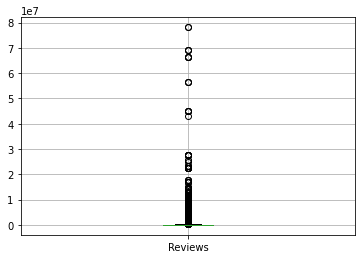

In [42]:
boxplot_reviews = app_rating2.boxplot(column = ['Reviews'])


d) Are there any apps with very high number of reviews? Do the values seem right?

Yes, there are apps with very high number of reviews. The Reviews's mean is 5.14 millions so, basically the outliers stars at Reviews with more than 2 milions and the values of the outliers don't seem right

e) Histogram for Rating


<AxesSubplot:ylabel='Frequency'>

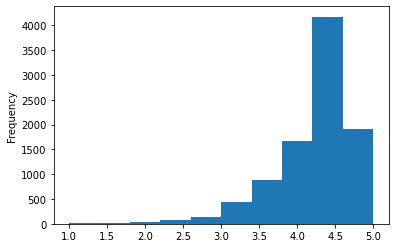

In [43]:
# Create the Histogram to show the number of occurrences of different values in the Rating column
app_rating2.Rating.plot.hist()

f) How are the ratings distributed? Is it more toward higher ratings?

The ratings are increasing.Yes, they are toward higher rating. They are higher in 4.5 and then, they decrease a little bit

g) Histogram for Size

<AxesSubplot:ylabel='Frequency'>

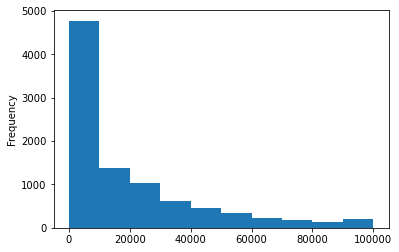

In [44]:
app_rating2.Size.plot.hist()

- Note down your observations for the plots made above. Which of these seem to have outliers?

Price: Some outliers are present, apps with Price > 50 seems to be outliers

Reviews: Some outliers are present, those apps with Reviews >200 millions seems to be outliers

Rating: 75% of the rating are good reviews (4.5)

Size: The majority of the apps size is below 27,000 k

## 6. Outlier treatment: 

Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!

Check out the records with very high price

Is 200 indeed a high price?

Drop these as most seem to be junk apps



In [45]:
count_p = app_rating2[app_rating2["Price"]> 200]
count_p.value_counts()

App                             Category   Rating  Reviews  Size     Installs  Type  Price   Content_rating  Genres         Last_updated       Current_version  Android_version
I AM RICH PRO PLUS              FINANCE    4.0     36       41000.0  1000      Paid  399.99  Everyone        Finance        June 25, 2018      1.0.2            4.1 and up         1
I Am Rich                       FAMILY     3.6     217      4900.0   10000     Paid  389.99  Everyone        Entertainment  June 22, 2018      1.5              4.2 and up         1
I Am Rich Premium               FINANCE    4.1     1867     4700.0   50000     Paid  399.99  Everyone        Finance        November 12, 2017  1.6              4.0 and up         1
I Am Rich Pro                   FAMILY     4.4     201      2700.0   5000      Paid  399.99  Everyone        Entertainment  May 30, 2017       1.54             1.6 and up         1
I am Rich                       FINANCE    4.3     180      3800.0   5000      Paid  399.99  Everyon

In [46]:
count_price = app_rating2[app_rating2["Price"]> 200].index
count_price.value_counts()

4362    1
5351    1
5354    1
5355    1
5356    1
5357    1
5358    1
5359    1
5362    1
5364    1
4367    1
5369    1
5366    1
4197    1
5373    1
dtype: int64

It seems those apps are the same with a high price and don't make sense. So, lets delete them

In [47]:
app_rating2.drop(count_price, inplace= True)

In [48]:
count_price = app_rating2[app_rating2["Price"]> 200].index
count_price.value_counts()

Series([], dtype: int64)

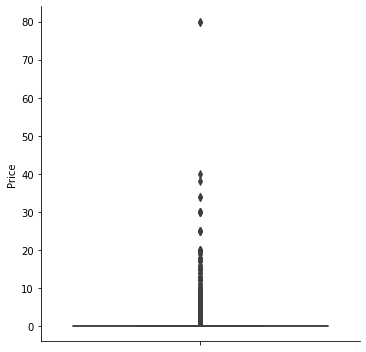

In [49]:
# Lets plot the data again
sns.catplot(y="Price", data= app_rating2, kind='box')

Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and,

in fact, will skew it. Drop records having more than 2 million reviews.


In [50]:
indexReviews = app_rating2[app_rating2['Reviews'] > 2000000]
indexReviews.value_counts()

App                                                 Category         Rating  Reviews   Size  Installs    Type  Price  Content_rating  Genres               Last_updated    Current_version     Android_version   
eBay: Buy & Sell this Summer - Discover Deals Now!  SHOPPING         4.4     2788923   0.0   100000000   Free  0.0    Teen            Shopping             July 30, 2018   Varies with device  Varies with device    4
Badoo - Free Chat & Dating App                      SOCIAL           4.3     3781770   0.0   100000000   Free  0.0    Mature 17+      Social               August 2, 2018  Varies with device  Varies with device    3
ZEDGE™ Ringtones & Wallpapers                       PERSONALIZATION  4.6     6466641   0.0   100000000   Free  0.0    Teen            Personalization      July 19, 2018   Varies with device  Varies with device    3
Skype - free IM & video calls                       COMMUNICATION    4.1     10484169  0.0   1000000000  Free  0.0    Everyone        Communicati

In [51]:
# Lets drop those 
indexReviews = app_rating2[app_rating2['Reviews'] > 2000000].index
app_rating2.drop(indexReviews, inplace= True)


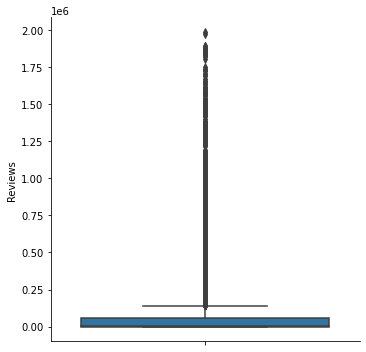

In [52]:
# Lets plot the data
sns.catplot(y='Reviews', data= app_rating2, kind= 'box')

Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

Decide a threshold as cutoff for outlier and drop records having values more than that

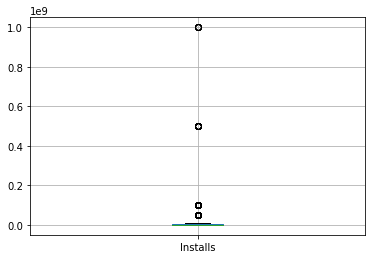

In [53]:
# Lets plot the data
boxplot_installs = app_rating2.boxplot(column = ['Installs'])

In [54]:
# Lets check how many we have
app_rating2['Installs'].value_counts()

1000000       1576
10000000      1238
100000        1149
10000         1003
5000000        752
1000           708
500000         537
50000          465
5000           428
100            308
50000000       247
500            201
100000000      122
10              66
50              56
500000000       14
5                7
1000000000       6
Name: Installs, dtype: int64

In [55]:
# It seems to be some outliers. Lets hence setting the threshold at 500000
percentils = [.10, .25, .50, .70, .90, .95, .99]
app_rating2['Installs'].describe(percentiles = percentils)

count    8.883000e+03
mean     6.268790e+06
std      3.540346e+07
min      5.000000e+00
10%      1.000000e+03
25%      1.000000e+04
50%      5.000000e+05
70%      1.000000e+06
90%      1.000000e+07
95%      1.000000e+07
99%      1.000000e+08
max      1.000000e+09
Name: Installs, dtype: float64

C:\Users\eliza\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Installs'>

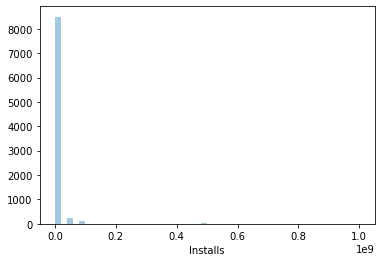

In [56]:
# Lets plot the data
sns.distplot(app_rating2['Installs'], kde= False)

In [57]:
# Lets fix the outliers
app_rating2.Installs = app_rating2.Installs.apply(func=np.log1p)

array([[<AxesSubplot:title={'center':'Installs'}>]], dtype=object)

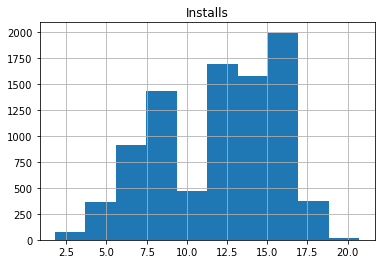

In [58]:
app_rating2.hist(column = ['Installs'])

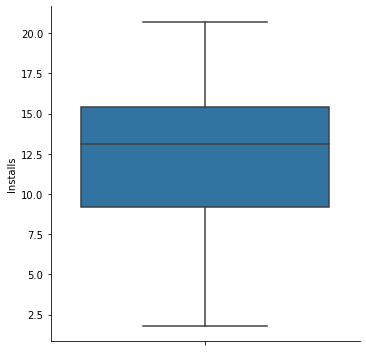

In [59]:
# Lets plot the data in a boxplot 
b_installs = sns.catplot(y='Installs', data= app_rating2, kind= 'box')

# 7. Bivariate analysis:

Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

### Make scatter plot/joinplot for Rating vs. Price

What pattern do you observe? Does rating increase with price?

<AxesSubplot:xlabel='Price', ylabel='Rating'>

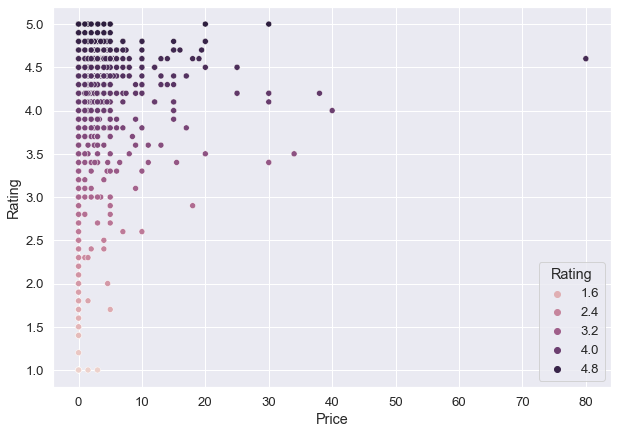

In [60]:
# Lets plot Rating vs Price
plt.figure(figsize = (10,7))
sns.set_style(style = 'whitegrid',)
sns.set(font_scale =1.2)
sns.scatterplot(x = app_rating2.Price, y = app_rating2.Rating, hue= app_rating2.Rating)

<AxesSubplot:xlabel='Price', ylabel='Rating'>

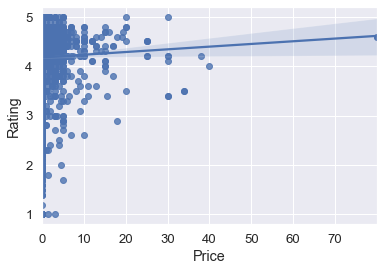

In [61]:
# Lets plot with a regression line
sns.regplot(x = app_rating2['Price'], y = app_rating2['Rating'] )

Observation: 

- Most apps show free, but it doesn't seem a relationship between free apps and high rating

- The regression line shows a sligh positive correlation on the other hand most app are free or less than $15, so there is no conclusive

### Make scatter plot/joinplot for Rating vs. Size

Are heavier apps rated better?

<AxesSubplot:xlabel='Size', ylabel='Rating'>

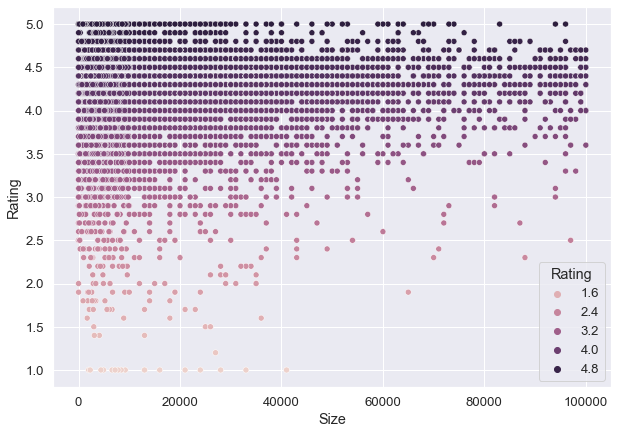

In [64]:
# Rating vs Size 
plt.figure(figsize =(10,7))
sns.scatterplot(x = app_rating2['Size'], y = app_rating2['Rating'], hue = app_rating2['Rating'])
                

Observation:

 - The scatterplot shows that increase in size does not guarantee a high rating. The majority of heavier apps shows to have better rating

### Make scatter plot/joinplot for Rating vs. Reviews

Does more review mean a better rating always?



<AxesSubplot:xlabel='Reviews', ylabel='Rating'>

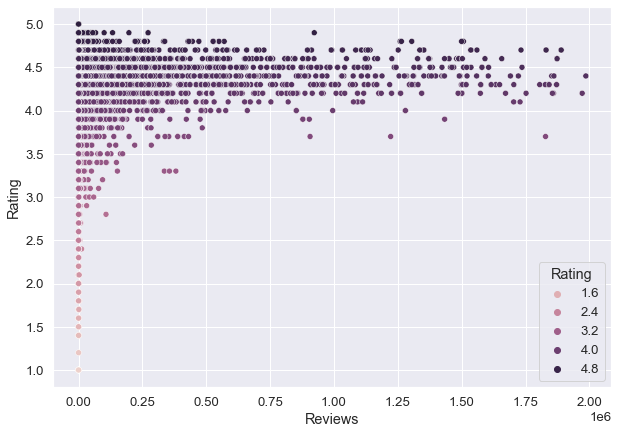

In [67]:
# Rating vs Reviews 
plt.figure(figsize =(10,7))
sns.scatterplot(x = app_rating2['Reviews'], y = app_rating2['Rating'], hue = app_rating2['Rating'])

Observations:
    
- More reviews necessarily doesn't mean a better rating.

- The tendency starts increasing but there are some values that tend to be lower after the reviews increase 


### Make boxplot for Rating vs. Content Rating

Is there any difference in the ratings? Are some types liked better?


<AxesSubplot:xlabel='Content_rating', ylabel='Rating'>

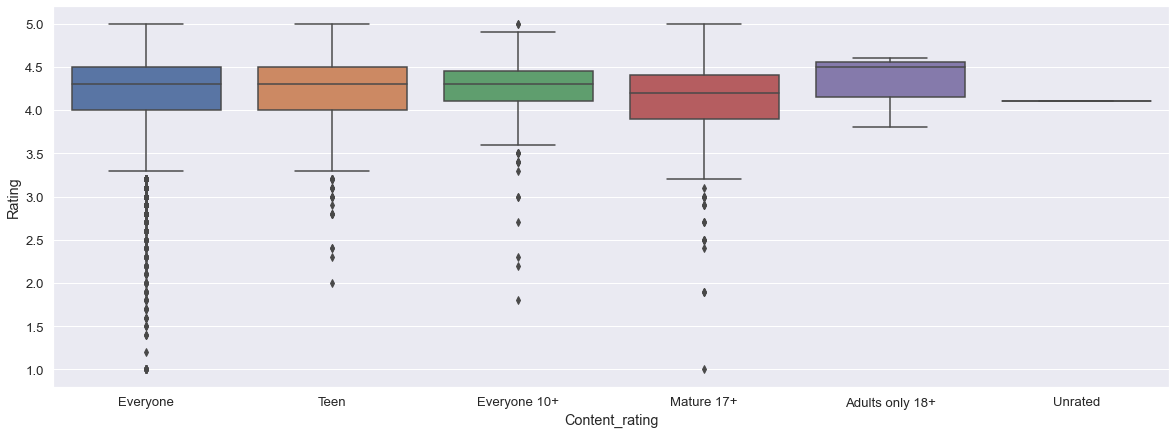

In [66]:
# Lets plot the data Rating vs Content Rating
plt.figure(figsize = (20,7))
sns.boxplot(x= app_rating2['Content_rating'], y= app_rating2["Rating"])

Observations:

- For the Content Rating of: Everyone, Teen, Everyone 10+ looks they are in a close range with the same Rating

- For the Mature 17+ looks to have the lowest mean together with the group of Unrated

- Meanwhile, Adults only 18+ have the highest mean

### Make boxplot for Ratings vs. Category

Which genre has the best ratings?


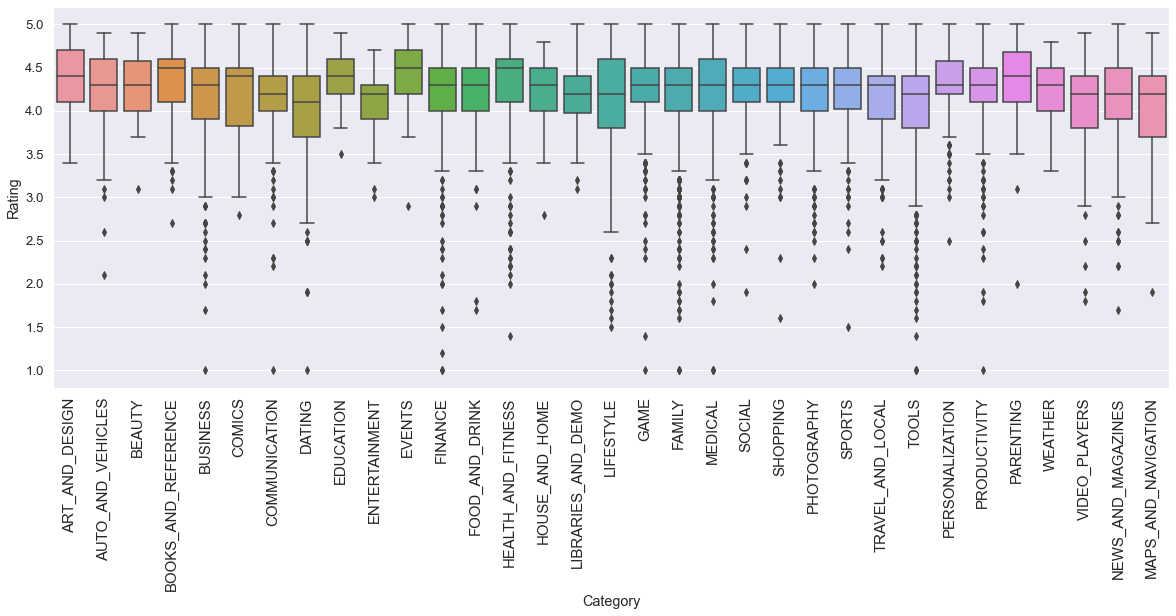

In [67]:
# Lets plot the data Rating vs Content Rating
plt.figure(figsize = (20,7))
b_rating_content = sns.boxplot(x= app_rating2['Category'], y= app_rating2["Rating"])
plt.xticks( fontsize = 15, rotation = 90)
plt.show()

Observations:

- The Genres with the highest mean are Health and Fitness, Books and Reference and Events

- The Genre with lower mean Rating is Dating

### 8. Data preprocessing

a) For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

b) Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

c) Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

d) Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [68]:
# a) For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.
inp1 = app_rating2.copy()

In [69]:
# b) Reviews and Install have some values that are still relatively very high. Before building a linear regression model, 
# you need to reduce the skew. 
# Apply log transformation (np.log1p) to Reviews and Installs.

inp1.Reviews = inp1.Reviews.apply(func=np.log1p)

# For Intalls it was done in the outlier treatment

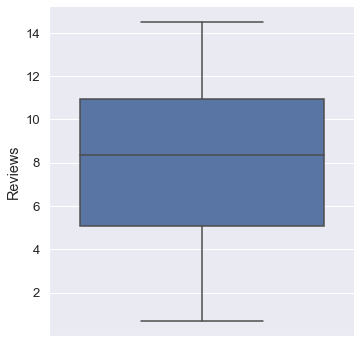

In [70]:
# Lets plot the data again 
b_reviews = sns.catplot(y='Reviews', data= inp1, kind= 'box')

In [71]:
# c) Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.
inp1.drop(['App', "Last_updated", "Current_version", "Android_version"], axis=1, inplace = True)

In [72]:
# Lets see our new dataframe
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8883 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        8883 non-null   object 
 1   Rating          8883 non-null   float64
 2   Reviews         8883 non-null   float64
 3   Size            8883 non-null   float64
 4   Installs        8883 non-null   float64
 5   Type            8883 non-null   object 
 6   Price           8883 non-null   float64
 7   Content_rating  8883 non-null   object 
 8   Genres          8883 non-null   object 
dtypes: float64(5), object(4)
memory usage: 952.0+ KB


In [73]:
# d) Get dummy columns for Category, Genres, and Content Rating. 
# This needs to be done as the models do not understand categorical data, and all data should be numeric. 
# Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

# Getting dummy columns for the categorical data and drop the first row to avoid dummy variable trap
inp2 = pd.get_dummies(inp1, drop_first = True)


### 9. Train test split  and apply 70-30 split. 

In [74]:
# Lets define the dependent and independent variable

x = inp2.iloc[:,1:]
y = inp2.iloc[:,:1]

### 10. Separate the dataframes into X_train, y_train, X_test, and y_test.

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .30, random_state=1)

### 11 . Model building

Use linear regression as the technique

Report the R2 on the train set

In [76]:
regressor = LinearRegression()
model = regressor.fit(x_train, y_train)

### 12. Make predictions on test set and report R2.

In [77]:
y_pred = regressor.predict(x_test)

In [78]:
# Finding the adjusted R2, R2 score and RMSE value
total = OLS( y_train, x_train).fit()
total.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              3711.
Date:                Tue, 25 Jan 2022   Prob (F-statistic):                        0.00
Time:                        20:00:07   Log-Likelihood:                         -4298.0
No. Observations:                6218   AIC:                                      8842.
Df Residuals:                    6095   BIC:                                      9670.
Df Model:                         123                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Reviews                                          0.1791      0.006     28.632      0.000       0.167       0.191
Size                                         -4.854e-07   3.26e-07     -1.489      0.136   -1.12e-06    1.53e-07
Installs                                        -0.1523      0.006    -24.457      0.000      -0.164      -0.140
Price                                           -0.0014      0.003     -0.438      0.661      -0.008       0.005
Category_AUTO_AND_VEHICLES                       1.1315      0.166      6.819      0.000       0.806       1.457
Category_BEAUTY                                  1.1799      0.169      6.994      0.000       0.849       1.511
Category_BOOKS_AND_REFERENCE                     1.1257      0.164      6.863      0.000       0.804       1.447
Category_BUSINESS                                1.0355      0.164      6.331      0.000       0.715       1.356
Category_COMICS                                  0.9923      0.167      5.934      0.000       0.664       1.320
Category_COMMUNICATION                           0.9930      0.164      6.066      0.000       0.672       1.314
Category_DATING                                  0.9337      0.165      5.667      0.000       0.611       1.257
Category_EDUCATION                               1.8005      0.329      5.469      0.000       1.155       2.446
Category_ENTERTAINMENT                           1.7226      0.329      5.233      0.000       1.077       2.368
Category_EVENTS                                  1.2060      0.169      7.156      0.000       0.876       1.536
Category_FAMILY                                  1.8412      0.324      5.682      0.000       1.206       2.477
Category_FINANCE                                 1.0133      0.163      6.201      0.000       0.693       1.334
Category_FOOD_AND_DRINK                          1.0257      0.165      6.214      0.000       0.702       1.349
Category_GAME                                    2.0490      0.325      6.300      0.000       1.411       2.686
Category_HEALTH_AND_FITNESS                      1.0548      0.164      6.448      0.000       0.734       1.375
Category_HOUSE_AND_HOME                          1.0762      0.166      6.483      0.000       0.751       1.402
Category_LIBRARIES_AND_DEMO                      1.1193      0.167      6.711      0.000       0.792       1.446
Category_LIFESTYLE                               1.3167      0.272      4.849      0.000       0.784       1.849
Category_MAPS_AND_NAVIGATION                     0.9752      0.165      5.915      0.000       0.652       1.298
Category_MEDICAL                              

In [79]:
# Lets see the results
print('R2_Score=', r2_score(y_test, y_pred))
print('Root_Mean_Squared_Error(RMSE)=',np.sqrt(ms(y_test,y_pred)))

R2_Score= 0.12222670401790092
Root_Mean_Squared_Error(RMSE)= 0.4819403794085199


Observations:
    - The Adjusted R-squared is 0.987 which means is very close to 1, 
    so the correlation between the predicted and the test value is good
